# Fourier Transform Using NumPy

In [7]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=[16, 12]
plt.rcParams.update({'font.size':18})
import warnings
warnings.filterwarnings('ignore')

### Step 1 : creating our signal
We need to create the signal on which we will then perform the fourier transform. We will do this using NumPy's sine function for the pure signals that we want and by using NumPy's random function to create white noise.

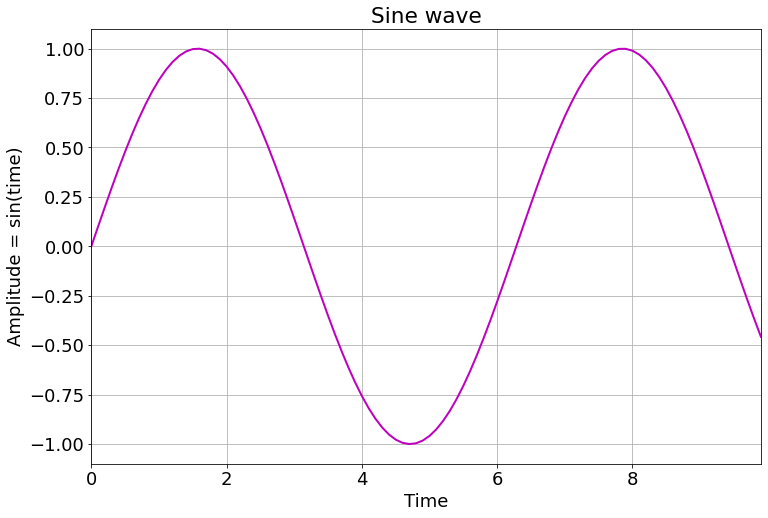

In [8]:
# Graphing NumPy's sine function 

# Get x values of the sine wave
time = np.arange(0, 10, .1) # arange returns evenly spaced values within a given interval

# Amplitude of the sine wave is sine of a variable like time
amplitude = np.sin(time)

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.figure(figsize=(12,8))
plt.plot(time, amplitude, color='m', linewidth=2)
plt.xlim(time[0],time[-1]) # sets x limits of current axis
plt.title('Sine wave')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.show()

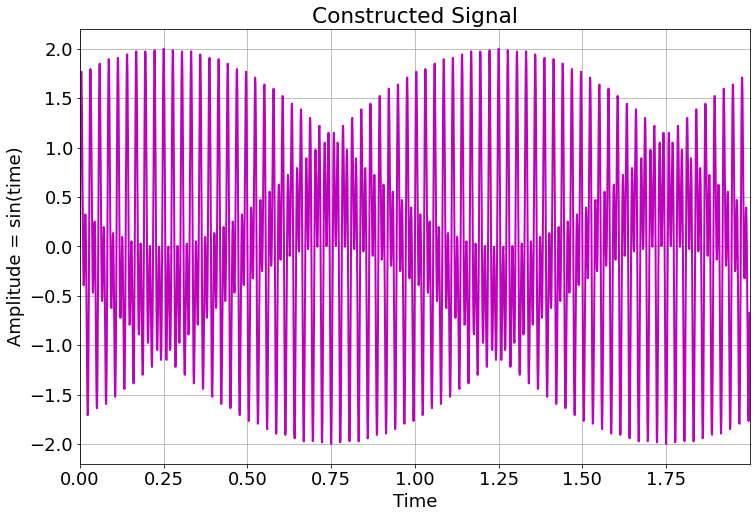

In [9]:
# Creating and graphing signal with two frequencies 

# Create signal
time_step = 0.001 
time = np.arange(0,2,time_step)
freq = np.sin(2*np.pi*37*time) + np.sin(2*np.pi*73*time) # sum of 2 frequencies with 37 hertz, 73 herz

# Plot
plt.figure(figsize=(12,8))
plt.plot(time, freq, color='m',linewidth=2)
plt.xlim(time[0],time[-1])
plt.title('Constructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')

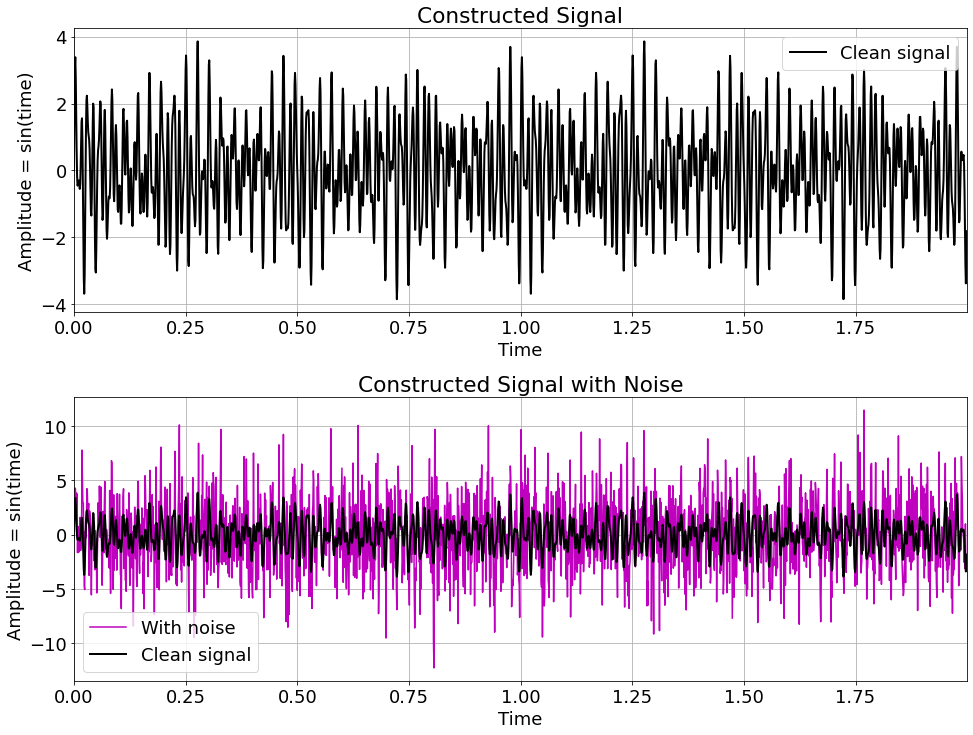

In [10]:
# Creating and graphing signal with four frequencies and white noise

time_step = 0.001 
time = np.arange(0,2,time_step)
# sum of 4 frequencies with 37 hertz, 73 herz, 77 hertz, and 120 hertz
freq = np.sin(2*np.pi*37*time) + np.sin(2*np.pi*73*time) + np.sin(2*np.pi*77*time) + np.sin(2*np.pi*120*time)
freq_clean = freq
freq = freq + 3*np.random.randn(len(time)) # add white noise to the signal

# Plot
fig,axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=.3)

plt.sca(axs[0])
plt.plot(time, freq_clean, color='k',linewidth=2, label='Clean signal')
plt.xlim(time[0],time[-1])
plt.title('Constructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.legend()

plt.sca(axs[1])
plt.plot(time, freq, color='m',linewidth=1.5, label='With noise')
plt.plot(time, freq_clean, color='k',linewidth=2, label='Clean signal')
plt.xlim(time[0],time[-1])
plt.title('Constructed Signal with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.legend()

plt.show()

### Step 2 : computing the Fourier Transform
We now need to perform the fourier transform on our data signal.

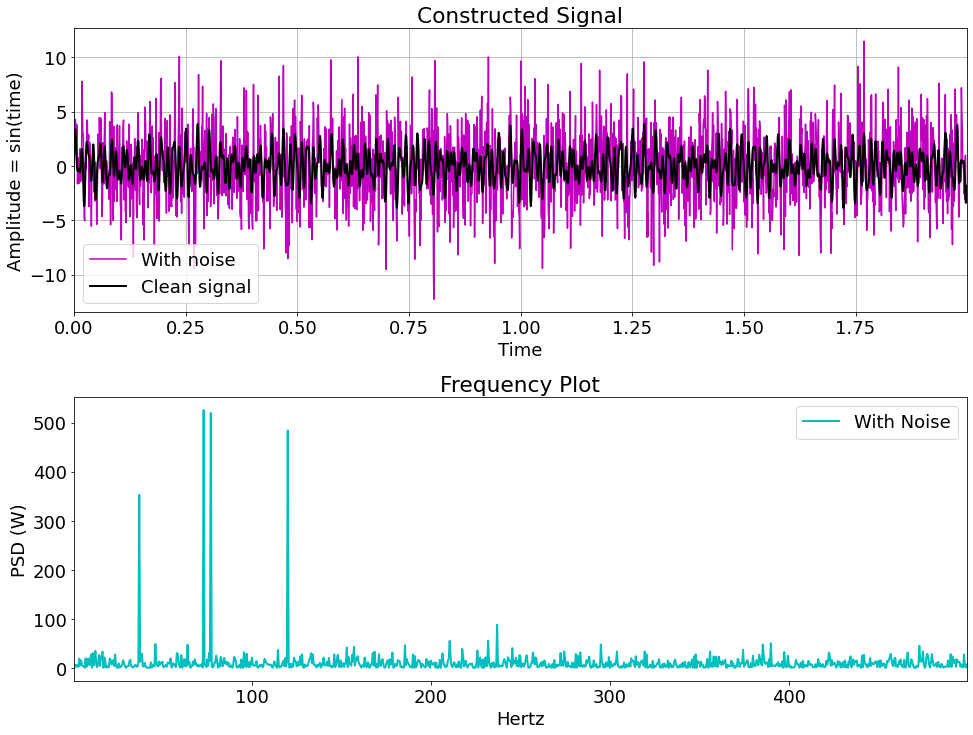

In [11]:
# Compute the Fourier Transform (FFT)

n = len(time) # length of data
freq_hat = np.fft.fft(freq,n) # compute the fft, fhat gives complex value fourier coefficients with magnitude and phase 
# magnitude tells how important that freq is and phase tells the mix of sine vs cosine
power = freq_hat *np.conj(freq_hat)/n # power spectral density, gives the (magnitude of each fourier coefficient)^squared
all_freq = (1/(time_step*n)) * np.arange(n) # create x-axis of all the frequencies
L = np.arange(1, np.floor(n/2), dtype='int') # only plot first half, plot power spectrum vs frequency in hertz


# Plot
fig,axs = plt.subplots(2,1)
plt.subplots_adjust(hspace=.3)

plt.sca(axs[0])
plt.plot(time, freq, color='m',linewidth=1.5, label='With noise')
plt.plot(time, freq_clean, color='k',linewidth=2, label='Clean signal')
plt.xlim(time[0],time[-1])
plt.title('Constructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.legend()

plt.sca(axs[1])
plt.plot(all_freq[L],power[L],color='c',linewidth=2,label='With Noise')
plt.xlim(all_freq[L[0]],all_freq[L[-1]])
plt.title('Frequency Plot')
plt.xlabel('Hertz')
plt.ylabel('PSD (W)')
plt.legend()

plt.show()

### Step 3: Remove all frequencies with low power then perform Inverse Fourier Transform
Looking at the frequency plot above, it is clear that particular frequencies have significantly more power than the rest. These are the frequencies we want to keep. So we need to select a threshold and any frequency under that power threshold will be removed. We will use 200 as our threshold. Then we will use NumPy's ifft to perform an inverse fourier transform and get back the original pure signal that we had.

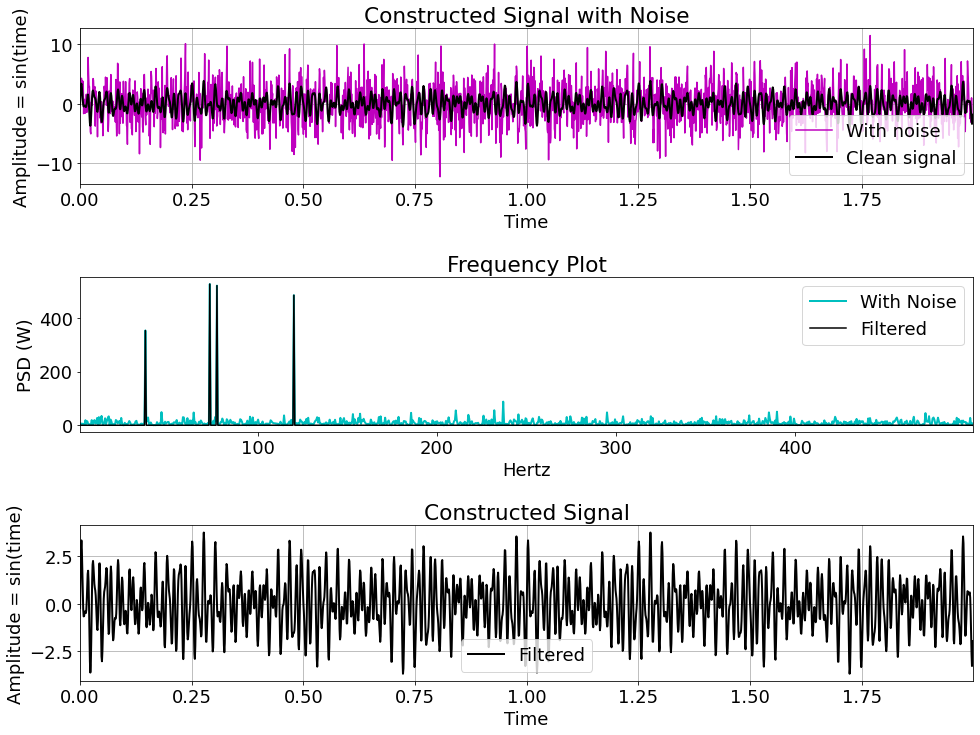

In [12]:
# Remove frequencies below threshold
indices = power > 200 # find all freqs with large power spectrum
PSDclean = power *indices # zeros out all others
freq_hat = indices *freq_hat # zero out small fourier coeffiencts in Y

# Perform inverse fourier transform on filtered data
inverse = np.fft.ifft(freq_hat) 

# Plot
fig,axs = plt.subplots(3,1)
plt.subplots_adjust(hspace=.6)

plt.sca(axs[0])
plt.plot(time, freq, color='m',linewidth=1.5, label='With noise')
plt.plot(time, freq_clean, color='k',linewidth=2, label='Clean signal')
plt.xlim(time[0],time[-1])
plt.title('Constructed Signal with Noise')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.legend()

plt.sca(axs[1])
plt.plot(all_freq[L],power[L],color='c',linewidth=2,label='With Noise')
plt.plot(all_freq[L],PSDclean[L],color='k',linewidth=1.5, label='Filtered')
plt.xlim(all_freq[L[0]],all_freq[L[-1]])
plt.title('Frequency Plot')
plt.xlabel('Hertz')
plt.ylabel('PSD (W)')
plt.legend()

plt.sca(axs[2])
plt.plot(time, inverse, color='k',linewidth=2,label='Filtered')
plt.xlim(time[0], time[-1])
plt.title('Constructed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude = sin(time)')
plt.grid(True, which='both')
plt.legend()

plt.show()